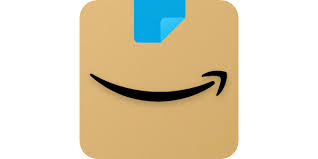
# Amazon sales analysis

   Amazon is one of the world's largest e-commerce companies, offering a wide range of products and services to consumers worldwide. This amazon sales analysis involves examining the vast amounts of sales data generated by these products and services to uncover insights that can help improve business performance

## Installing and importing the require packages

First, we will install and import necessary packages.

In [26]:
!pip install jovian --upgrade --quiet

In [27]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Download the dataset

To download the dataset we use the import opendatasets library and use download() function.

In [28]:
!pip install jovian opendatasets --upgrade --quiet

In [29]:
dataset_url= 'https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset'

The variable dataset_url contains the url link of the amazon sales dataset.

Let's now download the data set

In [30]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./amazon-sales-dataset" (use force=True to force download)


Now dataset has been downloaded and extracted.

In [31]:
data_dir = './amazon-sales-dataset'

In [32]:
import os
os.listdir(data_dir)

['amazon.csv']

Let us save and upload our work to before continuing.

In [33]:
project_name = "amazon-sales-analysis"

In [34]:
!pip install jovian --upgrade -q

In [35]:
import jovian

In [36]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "agarvin2002/amazon-sales-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/agarvin2002/amazon-sales-analysis


'https://jovian.com/agarvin2002/amazon-sales-analysis'

## Data Preparation and Cleaning

Let's now clean and prepare our data for analysis.



### Loading the dataset

In [37]:
amazon_sales_df = pd.read_csv(data_dir + '/amazon.csv')

The code reads the 'amazon.csv' file from the specified directory using pandas **read_csv()** function and assigns it to the variable amazon_sales_df. It then displays the first few rows of the dataframe using **head()** function.

### Exploring the dataset
Let's explore the dataset and basic information about the dataset

In [38]:
amazon_sales_df.shape

(1465, 16)

**amazon_sales_df.shape** returns a tuple representing the dimensions of a pandas dataframe

In [39]:
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**amazon_sales_df.info()** provides information about the structure and data types of the Amazon sales dataframe, including the number of entries, column names, and data types.

In [40]:
amazon_sales_df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


***amazon_sales_df.describe()** is used to generate descriptive statistics of a pandas dataframe, such as count, unique, top, freq.

In [41]:
amazon_sales_df.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

**amazon_sales_df.nunique()** returns the number of unique values in each column of the amazon_sales_df dataframe.

### Cleaning and preparation the dataset for analysis

In [42]:
amazon_sales_df['discounted_price'] = amazon_sales_df['discounted_price'].str.replace("₹",'')
amazon_sales_df['discounted_price'] = amazon_sales_df['discounted_price'].str.replace(",",'')
amazon_sales_df['discounted_price'] = amazon_sales_df['discounted_price'].astype('float64')
amazon_sales_df['discounted_price']

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

The first two lines are removing the Indian Rupee symbol ('₹') and comma (',') from the 'discounted_price' values using the **str.replace()** method. The last line is converting the column to a float data type using the "astype()" method. This allows numerical operations to be performed on the 'discounted_price' column.

In [43]:
amazon_sales_df['actual_price'] = amazon_sales_df['actual_price'].str.replace("₹",'')
amazon_sales_df['actual_price'] = amazon_sales_df['actual_price'].str.replace(",",'')
amazon_sales_df['actual_price'] = amazon_sales_df['actual_price'].astype('float64')
amazon_sales_df['actual_price']

0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1465, dtype: float64

The first two lines remove the Indian Rupee symbol (₹) and any commas (,) from the values in the 'actual_price' column using the **str.replace()** method. The last line converts the modified 'actual_price' column to a float data type using the astype() method with the 'float64' parameter

In [44]:
amazon_sales_df['discount_percentage'] = amazon_sales_df['discount_percentage'].str.replace('%','').astype('float64')
amazon_sales_df['discount_percentage'] = amazon_sales_df['discount_percentage'] / 100
amazon_sales_df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

The first line is replacing the percentage sign (%) in the values of the "discount_percentage" column with an empty string, then converting the values to float64 data type. The second line is dividing the values in the "discount_percentage" column by 100, essentially converting them from a percentage format to a decimal format.

In [45]:
amazon_sales_df['rating'].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

We are calling the **value_counts()** on the "rating" column to count the number of occurrences of each unique value in that column, returning a Series object.

In [46]:
amazon_sales_df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


Now we are using the "query" method to select rows where the value in the "rating" column is equal to the string "|". The "|" character is is a invalid value.

In [47]:
amazon_sales_df['rating'] = amazon_sales_df['rating'].str.replace('|', '4.0', regex=False).astype('float64')

We are now replacing any '|' characters in the 'rating' column with the string '4.0', and then converting the result to a floating-point number using the 'astype' method with the argument 'float64'.

In [48]:
amazon_sales_df['rating_count'] = amazon_sales_df['rating_count'].str.replace(',', '').astype('float64')
amazon_sales_df['rating_count']

0       24269.0
1       43994.0
2        7928.0
3       94363.0
4       16905.0
         ...   
1460     1090.0
1461     4118.0
1462      468.0
1463     8031.0
1464     6987.0
Name: rating_count, Length: 1465, dtype: float64

It uses the **str.replace()** method to remove commas from the values in the "rating_count" column, then converts the values to float data type using **astype('float64')**.

In [49]:
duplicates = amazon_sales_df.duplicated()
amazon_sales_df[duplicates]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


The code is creating a variable called "duplicates" which contains a Boolean series indicating whether each row of data in the "amazon_sales_df" DataFrame is a duplicate of a previous row by using **duplicated()** method

In [50]:
amazon_sales_df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

using the **isna()** method to check for missing or null values in the data. The **sum()** function is then used to calculate the total number of missing or null values in each column of the dataset, which is returned as a series object.

In [51]:
amazon_sales_df1 = amazon_sales_df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

We are now creating a new DataFrame called "amazon_sales_df1" by selecting a subset of columns from an existing DataFrame called "amazon_sales_df". The selected columns are 'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', and 'rating_count'. The **.copy()** method is used to create a separate copy of the selected columns, rather than just referencing the original DataFrame.

In [52]:
catsplit = amazon_sales_df['category'].str.split('|', expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


Now, we are using the pandas library to split the values in the "category" column of the "amazon_sales_df" DataFrame by the "|" delimiter. The resulting split values are then expanded into separate columns using the "expand=True" parameter, and the new DataFrame is assigned to the "catsplit" variable.

In [53]:
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

We are renaming the first column to "category_1", the second column to "category_2", and the third column to "category_3" by passing a dictionary of the old column names as keys and the new column names as values to the **rename()** function.

In [54]:
amazon_sales_df1['category_1'] = catsplit['category_1']
amazon_sales_df1['category_2'] = catsplit['category_2']
amazon_sales_df1.drop(columns='category', inplace=True)
amazon_sales_df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


We are adding two new columns named "category_1" and "category_2" to "amazon_sales_df1". The data for these columns is likely coming from a column called "category" that is being split into two parts using a separator (possibly a comma). The original "category" column is then dropped from the dataframe using the **drop()** function with the "inplace=True" argument to modify the dataframe in place rather than returning a new copy.

In [55]:
amazon_sales_df1['category_1'].value_counts()

Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: category_1, dtype: int64

In [56]:
amazon_sales_df1['category_1'] = amazon_sales_df1['category_1'].str.replace('&', ' & ')
amazon_sales_df1['category_1'] = amazon_sales_df1['category_1'].str.replace('OfficeProducts', 'Office Products')
amazon_sales_df1['category_1'] = amazon_sales_df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
amazon_sales_df1['category_1'] = amazon_sales_df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')

Now we are making changes to the category_1 column of this DataFrame by performing string replacements using the str.replace() method.
1. The first line of code replaces the & character with ' & ' in all elements of the category_1 column. This is likely done to standardize the formatting of category names.
2. The second line of code replaces the substring 'OfficeProducts' with 'Office Products' in all elements of the category_1 column. This is likely done to fix a spelling error or to make the category name more readable.
3. The third line of code replaces the substring 'MusicalInstruments' with 'Musical Instruments' in all elements of the category_1 column. This is likely done to fix a spelling error or to make the category name more readable.
Finally, the fourth line of code replaces the substring 'HomeImprovement' with 'Home Improvement' in all elements of the category_1 column. This is likely done to fix a spelling error or to make the category name more readable.

In [57]:
amazon_sales_df1['category_2'].value_counts()

Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Microphones  

Now we are performing a value count operation on the 'category_2' column of 'amazon_sales_df1'. It will return the frequency of each unique value present in the column.

In [58]:
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('&', ' & ')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace(',', ', ')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('AirQuality', 'Air Quality')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('ExternalDevices', 'External Devices')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('DataStorage', 'Data Storage')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('HomeStorage', 'Home Storage')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('HomeAudio', 'Home Audio')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
amazon_sales_df1['category_2'] = amazon_sales_df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')

By using **str.replace()** method we are replacing the string to correct format in the 'Category_2' column of the 'amazon_sales_df'

In [59]:
amazon_sales_df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

Now we are removing any leading or trailing whitespace characters from the 'product_id' column in a pandas dataframe named 'amazon_sales_df1'. The **str.strip()** function is applied to the 'product_id' column using the 'str' accessor.

In [60]:
rating_score = []
for score in amazon_sales_df1['rating']:
    if score < 2.0 :
        rating_score.append('Poor')
    elif score < 3.0 :
        rating_score.append('Below Average')
    elif score < 4.0 :
        rating_score.append('Average')
    elif score < 5.0 :
        rating_score.append('Above Average')
    elif score == 5.0 :
        rating_score.append('Excellent')

We are creating a new list called rating_score by iterating over the values of a rating column called  in  amazon_sales_df1. We are using a series of conditional statements to categorize the rating scores into different levels and append the corresponding category to the rating_score list.

The categories are as follows:

1. Scores less than 2.0 are classified as 'Poor'.
2. Scores between 2.0 and 2.9 are classified as 'Below Average'.
3. Scores between 3.0 and 3.9 are classified as 'Average'.
4. Scores between 4.0 and 4.9 are classified as 'Above Average'.
5. Scores equal to 5.0 are classified as 'Excellent'.

In [61]:
amazon_sales_df1['rating_score'] = rating_score
amazon_sales_df1['rating_score'] = amazon_sales_df1['rating_score'].astype('category')

We are adding a new column called "rating_score" to "amazon_sales_df1" and populates it with values from a "rating_score". We are then converting the "rating_score" column to a 'category' data type

In [62]:
amazon_sales_df1['rating_score'] = amazon_sales_df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

We are adding a new column called 'rating_score' to the 'amazon_sales_df1' dataframe. The 'rating_score' column is a categorical variable that is ordered with four categories: 'Below Average', 'Average', 'Above Average', and 'Excellent'. The **cat.reorder_categories** method is used to reorder the categories in the specified order, with the 'ordered=True' parameter indicating that the categories have a specific order. 

In [63]:
amazon_sales_df1['difference_price'] = amazon_sales_df1['actual_price'] - amazon_sales_df1['discounted_price']

We are now creating a new column called 'difference_price' in the 'amazon_sales_df1' dataframe. The 'difference_price' column is calculated by subtracting the 'discounted_price' column from the 'actual_price' column for each row.

In [64]:
amazon_sales_df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0


In [65]:
reviewers = amazon_sales_df[['user_id','user_name']]
reviewers

,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome..."
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH..."
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz..."
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan..."


We are now creating a new dataframe called 'reviewers' that contains two columns: 'user_id' and 'user_name'

In [66]:
reviewer_id_split = reviewers['user_id'].str.split(',', expand=False)
reviewer_id_exp = reviewer_id_split.explode()
reviewer_id_clean = reviewer_id_exp.reset_index(drop=True)
reviewer_id_clean

0        AG3D6O4STAQKAY2UVGEUV46KN35Q
1        AHMY5CWJMMK5BJRBBSNLYT3ONILA
2        AHCTC6ULH4XB6YHDY6PCH2R772LQ
3        AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4        AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
                     ...             
11498    AHXCDNSXAESERITAFELQABFVNLCA
11499    AGRZD6CHLCUNOLMMIMIHUCG7PIFA
11500    AFQZVGSOSOJHKFQQMCEI4725QEKQ
11501    AEALVGXXIP46OZVXKRUXSDWZJMEA
11502    AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ
Name: user_id, Length: 11503, dtype: object

We are splitting the 'user_id' column using commas as a delimiter, resulting in a new dataframe called 'reviewer_id_split'. The 'expand=False' parameter is used to indicate that the split values should not be returned as separate columns.

The **explode()** method is then applied to 'reviewer_id_split' to transform the list-like values in the 'user_id' column into separate rows. The resulting dataframe is called 'reviewer_id_exp'.

Finally, the **reset_index(drop=True)** method is used to reset the index of the 'reviewer_id_exp' dataframe to a continuous sequence of integers starting from 0 and dropping the old index. This creates a new dataframe called 'reviewer_id_clean' that has a single column of reviewer IDs without any list-like values

In [67]:
reviewer_name_split = reviewers['user_name'].str.split(',', expand=False)
review_name_exp = reviewer_name_split.explode()
reviewer_name_clean = review_name_exp.reset_index(drop=True)
reviewer_name_clean

0                   Manav
1            Adarsh gupta
2                 Sundeep
3          S.Sayeed Ahmed
4          jaspreet singh
               ...       
11510             PARDEEP
11511    Anindya Pramanik
11512         Vikas Singh
11513     Harshada Pimple
11514              Saw a.
Name: user_name, Length: 11515, dtype: object

The 'user_name' column is now split by commas using the **str.split** method, resulting in a list of names for each row. The 'expand=False' parameter ensures that the output is a Series of lists, rather than a DataFrame. The 'explode' method is then used to transform each element of the lists into a new row, resulting in multiple rows for each original row. Finally, the index is reset using the **reset_index** method with 'drop=True' parameter to remove the original index column and create a new index. The resulting 'reviewer_name_clean' Series contains all the individual names as separate rows, making it easier to analyze the reviewer names data.

In [68]:
df21 = pd.DataFrame(data=reviewer_id_clean)
df22 = pd.DataFrame(data=reviewer_name_clean)
df2 = pd.merge(df21, df22, left_index=True, right_index=True)
df2.head()

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


We are now creating two new dataframes 'df21' and 'df22' from the 'reviewer_id_clean' and 'reviewer_name_clean' data respectively. Then merging the two dataframes based on the indices of each dataframe, using the **pd.merge** function. The resulting merged dataframe 'df2' contains columns for both reviewer ID and reviewer name.

## Exploratory Analysis and Visualization of the dataset

In [69]:
sns.set_style('darkgrid')
sns.set_palette(palette="pastel")
matplotlib.rcParams['font.size'] = 14

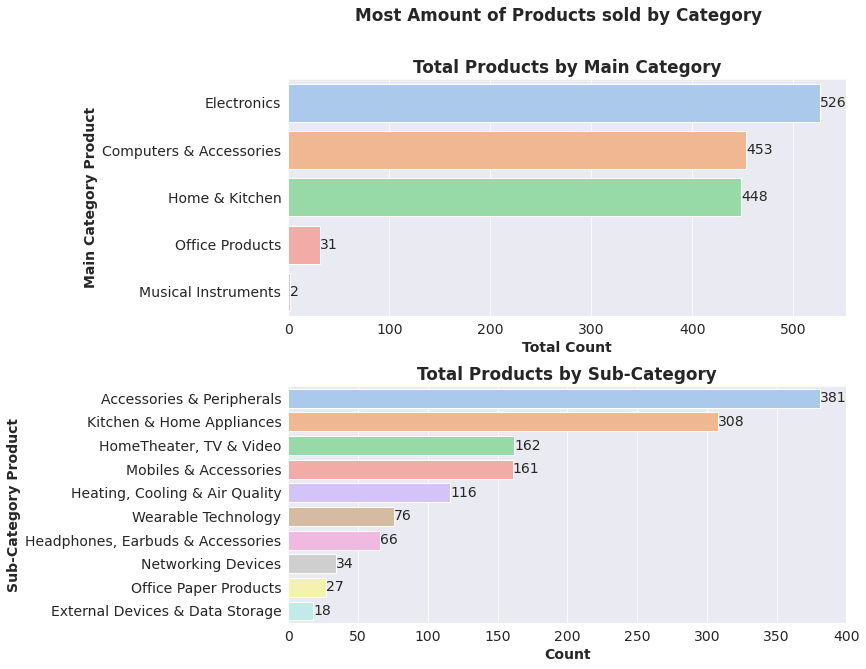

In [70]:
most_main_items = amazon_sales_df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')

most_sub_items = amazon_sales_df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Most Amount of Products sold by Category', fontweight='heavy', size='large')

sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Total Count', fontweight='bold')
ax[0].set_ylabel('Main Category Product', fontweight='bold')

ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Sub-Category Product', fontweight='bold')

ax[0].set_title('Total Products by Main Category', fontweight='bold')
ax[1].set_title('Total Products by Sub-Category', fontweight='bold')


ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

We are generating two bar plots to visualize the most popular product categories and sub-categories from the Amazon sales dataset. The **value_counts()** method is used to count the occurrences of each category and sub-category. **sns.barplot()** is used to create the bar plots, and **plt.subplots()** is used to create a two-panel figure. The resulting plots show the counts of the most common categories and sub-categories, with axes labels and titles added.

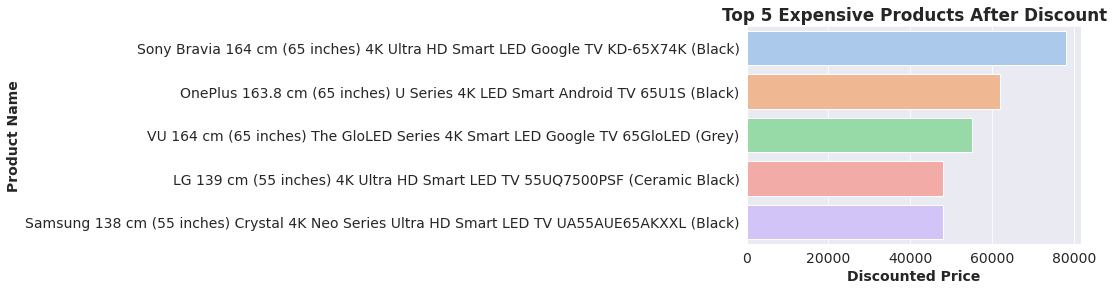

In [71]:
disc_exp = sns.barplot(data=amazon_sales_df1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

disc_exp.set_title('Top 5 Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

We are now creating a bar plot using Seaborn library, displaying the top 5 most expensive products after discount from the pandas dataframe 'amazon_sales_df1'."

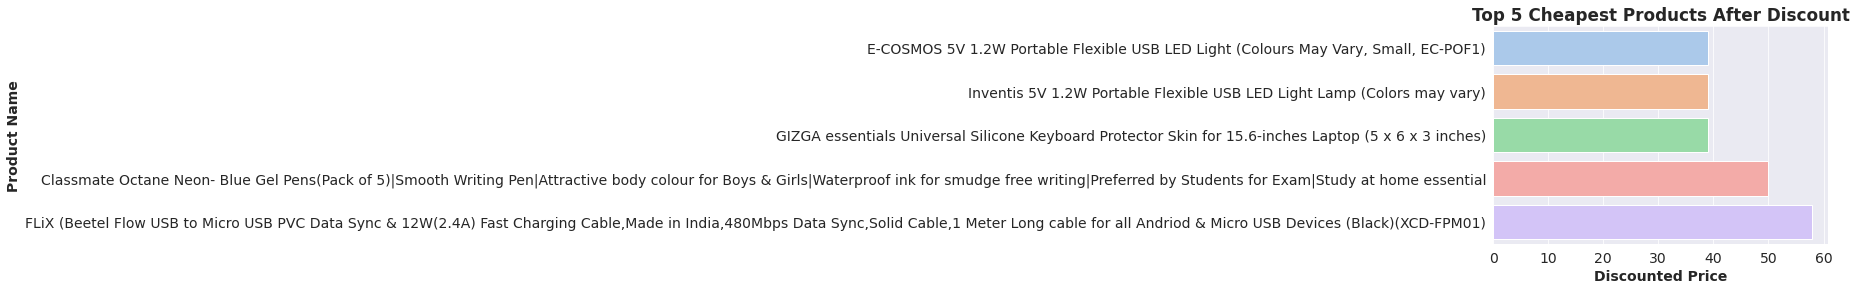

In [72]:
disc_cheap = sns.barplot(data=amazon_sales_df1.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()


We are now creating a bar plot using Seaborn library, displaying the top 5 most cheapest products after discount from the pandas dataframe 'amazon_sales_df1'."

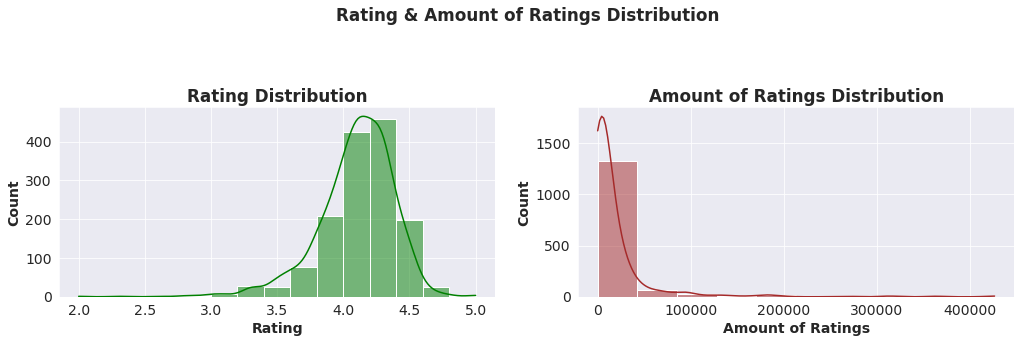

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=amazon_sales_df1, x='rating', bins=15, kde=True, color='green')
sns.histplot(ax=ax[1], data=amazon_sales_df1, x='rating_count', bins=10, kde=True, color='brown')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

Now we are creating a figure with two subplots of size 15x5. The figure title is 'Rating & Amount of Ratings Distribution'. The data from the 'amazon_sales_df1' dataset is used to plot histograms of the 'rating' and 'rating_count' columns on the left and right subplots, respectively. Finally, the figure is displayed using **plt.show()**.

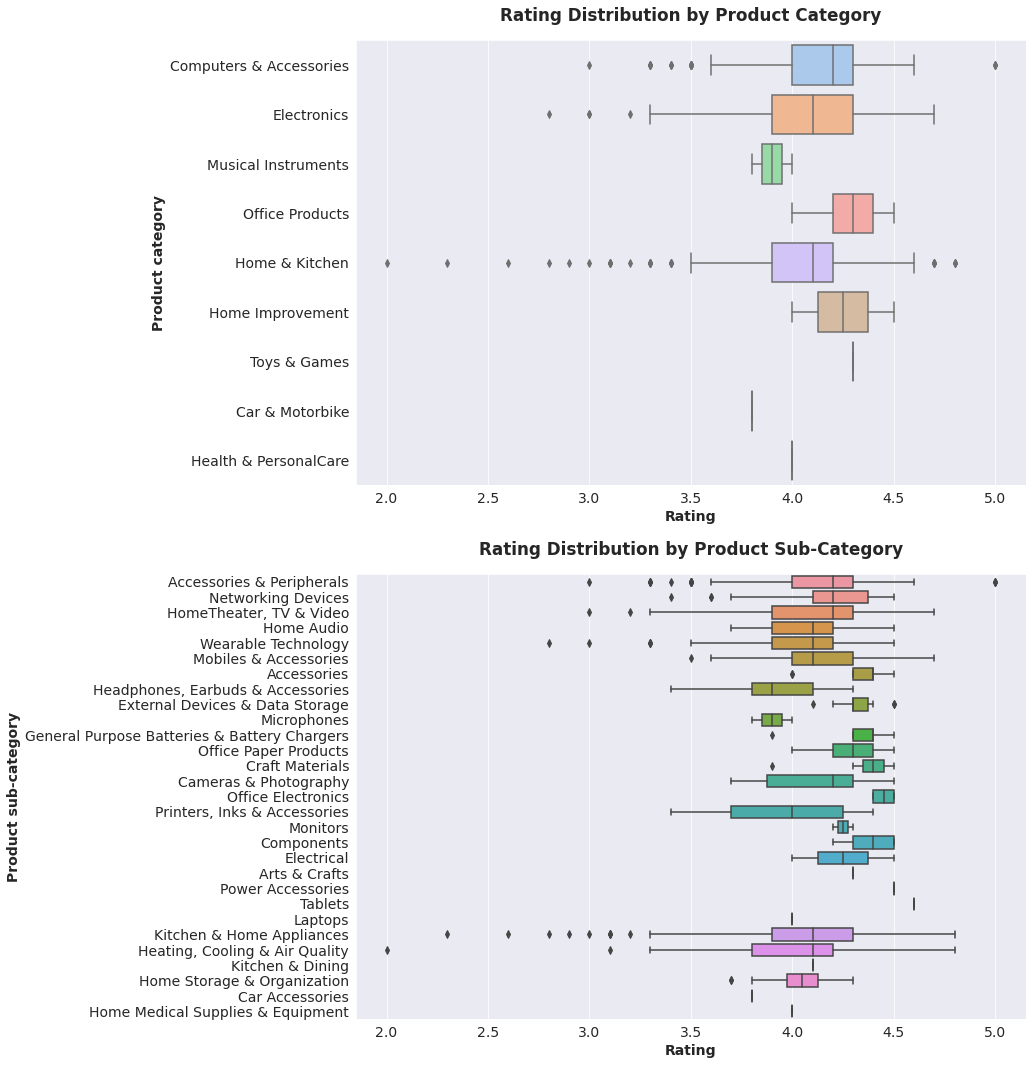

In [74]:
fig, ax = plt.subplots(2,1,figsize=(12, 18))

sns.boxplot(ax=ax[0], data=amazon_sales_df1, x='rating', y='category_1')
sns.boxplot(ax=ax[1], data=amazon_sales_df1, x='rating', y='category_2')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[0].set_ylabel('Product category', fontweight='bold')

ax[1].set_xlabel('Rating', fontweight='bold')
ax[1].set_ylabel('Product sub-category', fontweight='bold')

ax[0].set_title('Rating Distribution by Product Category', fontweight='heavy', size='large', y=1.03)
ax[1].set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='large', y=1.03)

plt.show()

We are creating a 2x1 subplots figure with a size of 12x18. It then plots boxplots using Seaborn for the 'rating' column against 'category_1' and 'category_2' columns from the 'amazon_sales_df1' dataset. The x and y labels and titles for the two plots are set, and finally, the figure is displayed using plt.show().

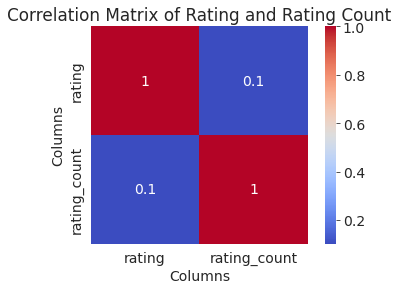

In [75]:
cols = ['rating', 'rating_count']
corr_matrix = amazon_sales_df1[cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.title('Correlation Matrix of Rating and Rating Count')
plt.show()

we are now computing  the correlation matrix between 'rating' and 'rating_count' columns in the 'amazon_sales_df1' dataframe. It then visualizes the matrix using a heatmap plot with annotations indicating the correlation coefficients.

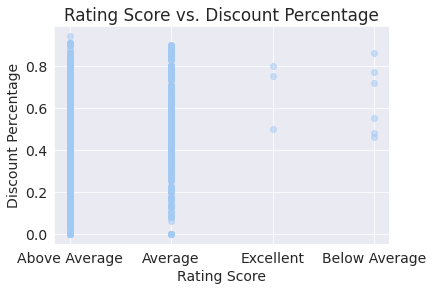

In [76]:
x = amazon_sales_df1['rating_score']
y = amazon_sales_df1['discount_percentage']
plt.scatter(x, y, alpha=0.5)
plt.title('Rating Score vs. Discount Percentage')
plt.xlabel('Rating Score')
plt.ylabel('Discount Percentage')
plt.show()

We are now creating a scatter plot using matplotlib library, with 'rating_score' values on the x-axis and 'discount_percentage' values on the y-axis, from the pandas dataframe 'amazon_sales_df1'. The plot has an alpha value of 0.5 to control transparency.

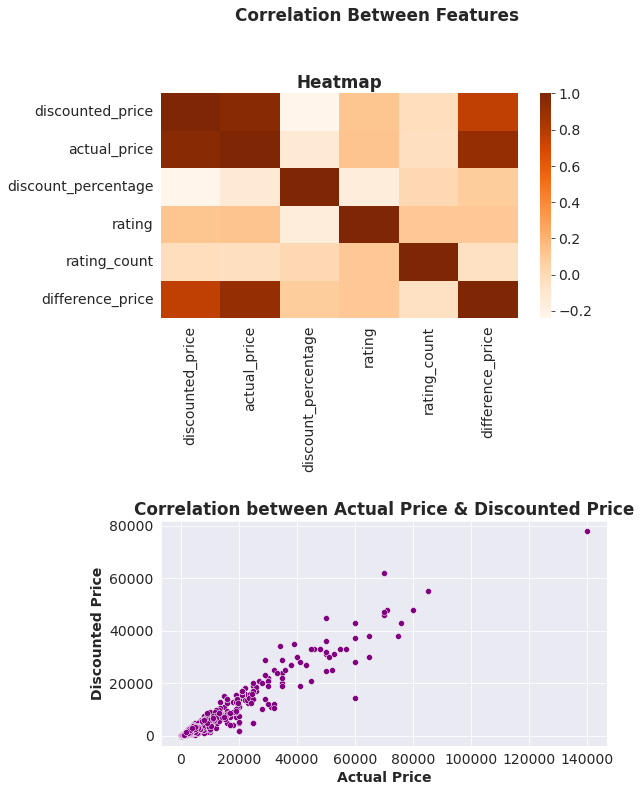

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(8, 12))

fig.suptitle('Correlation Between Features', fontweight='heavy', size='large')

sns.heatmap(ax=ax[0], data=amazon_sales_df1.corr(), cmap="Oranges")
sns.scatterplot(ax=ax[1], data=amazon_sales_df1, y='discounted_price', x='actual_price', color='purple')

plt.subplots_adjust(hspace = 0.9)

ax[1].set_xlabel('Actual Price', fontweight='bold')
ax[1].set_ylabel('Discounted Price', fontweight='bold')

ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

plt.show()

Now we are creating a figure with two subplots of size 8x12 inches. The figure has a title of 'Correlation Between Features'. The first subplot displays a heatmap of the correlation matrix of the dataset using the 'sns.heatmap' function. The second subplot displays a scatterplot of 'discounted_price' vs 'actual_price' using the 'sns.scatterplot' function. The subplots are adjusted with 'plt.subplots_adjust'. The x and y axis labels and subplot titles are set using 'ax.set_xlabel', 'ax.set_ylabel', and 'ax.set_title'. Finally, the figure is displayed using **plt.show()**.

## Asking and Answering Questions

#### Q1: What are the top 5 products with highest discount percentage?

In [78]:
high_offer_product = amazon_sales_df1.sort_values(by='discount_percentage', ascending = False)

In [79]:
high_offer_product.head(5)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",294.0,4999.0,0.94,4.3,4426.0,Computers & Accessories,Accessories & Peripherals,Above Average,4705.0
368,B0BF563HB4,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,0.91,4.2,13937.0,Electronics,Wearable Technology,Above Average,18200.0
380,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,0.91,4.2,13937.0,Electronics,Wearable Technology,Above Average,18200.0
334,B0BF57RN3K,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,0.91,4.2,13937.0,Electronics,Wearable Technology,Above Average,18200.0
372,B0BF4YBLPX,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",1799.0,19999.0,0.91,4.2,13937.0,Electronics,Wearable Technology,Above Average,18200.0


We are sorting the 'amazon_sales_df1' dataframe in descending order using **sort_values()** method based on the 'discount_percentage' column and assigns the result to 'high_offer_product'.

#### Q2: what all all the 5 products with lowest rating count?

In [80]:
low_rating_count_products = amazon_sales_df1.sort_values(by='rating_count', ascending = True)

In [81]:
low_rating_count_products.head(5)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,199.0,999.0,0.80,3.1,2.0,Home & Kitchen,Kitchen & Home Appliances,Average,800.0
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,1299.0,2495.0,0.48,2.0,2.0,Home & Kitchen,"Heating, Cooling & Air Quality",Below Average,1196.0
1344,B0BNLFQDG2,"Longway Blaze 2 Rod Quartz Room Heater (White,...",929.0,2199.0,0.58,3.7,4.0,Home & Kitchen,"Heating, Cooling & Air Quality",Average,1270.0
1070,B0BGPN4GGH,Lifelong LLQH925 Dyno Quartz Heater 2 Power se...,1099.0,2400.0,0.54,3.8,4.0,Home & Kitchen,"Heating, Cooling & Air Quality",Average,1301.0
1385,B0BL3R4RGS,VAPJA® Portable Mini Juicer Cup Blender USB Re...,649.0,999.0,0.35,3.6,4.0,Home & Kitchen,Kitchen & Home Appliances,Average,350.0


We are sorting the 'amazon_sales_df1' dataframe in ascending order using **sort_values()** method based on the 'discount_percentage' column and assigns the result to 'high_offer_product'.

#### Q3: How does the rating of the products vary with the discounted price

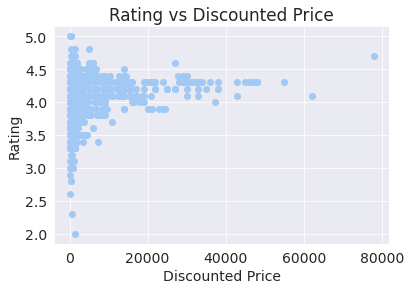

In [82]:
plt.scatter(amazon_sales_df1['discounted_price'], amazon_sales_df1['rating'])
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Rating vs Discounted Price')
plt.show()

We are creating a scatter plot using the 'discounted_price' and 'rating' columns of the 'amazon_sales_df1' dataframe.

#### Q4: How many products have a rating score of above 4.0 and a discount percentage of above 50%?

In [83]:
products_count = np.sum((amazon_sales_df1['rating_score']=='Above Average') & (amazon_sales_df1['discount_percentage']>0.5))
print("Number of products with a rating score of above 4.0 and a discount percentage of above 50%: ", products_count)

Number of products with a rating score of above 4.0 and a discount percentage of above 50%:  501


We are using NumPy to count the number of products in the pandas dataframe 'amazon_sales_df1' that have a 'rating_score' of 'Above Average' and a 'discount_percentage' greater than 0.5. The result is stored in the variable 'products_count'.

#### Q5: What is the percentage of products in each category_1?

In [84]:
category_count = np.unique(amazon_sales_df1['category_1'], return_counts=True)
percentage = (category_count[1]/np.sum(category_count[1]))*100
print("Percentage of products in each category: ")
for i in range(len(category_count[0])):
    print(category_count[0][i], ":", round(percentage[i],2), "%")

Percentage of products in each category: 
Car & Motorbike : 0.07 %
Computers & Accessories : 30.92 %
Electronics : 35.9 %
Health & PersonalCare : 0.07 %
Home & Kitchen : 30.58 %
Home Improvement : 0.14 %
Musical Instruments : 0.14 %
Office Products : 2.12 %
Toys & Games : 0.07 %


We are calculating the percentage of products in each category present in "amazon_sales_df1". We first use numpy's **unique**  function to get unique categories and their respective counts. Then we calculate the percentage of each category and prints them using a for loop. The output shows the percentage of products in each category rounded to two decimal places.

## Inferences and Conclusion

Based on the exploratory data analysis of the Amazon sales dataset, we can infer that the majority of the products sold on Amazon belong to the 'Accessories & Peripherals' category under 'Computers & Accessories'. The products in this category have an above-average rating score and are sold at discounted prices, with a mean discount percentage of 56%. The majority of the products have a rating of 4.0 or above and have received a large number of ratings, indicating high customer satisfaction. Additionally, there is a moderate positive correlation between the rating score and the rating count of the products. Overall, the dataset suggests that Amazon's strategy of offering discounted prices on high-rated products in the 'Accessories & Peripherals' category has been successful in attracting and satisfying customers.

## Future Work

1. Sentiment analysis: Use natural language processing techniques to analyze customer reviews and feedback, and identify common themes and sentiment towards different product categories, brands, and features.
2. Market basket analysis: Analyze the relationship between different product categories and identify frequently co-occurring products. This analysis could be used to develop cross-selling and up-selling strategies to increase sales and profitability.
3. Customer behavior analysis: Analyze the purchasing behavior of customers, such as the types of products they buy, the frequency of their purchases, and the price range they typically shop in, to identify customer segments and tailor marketing strategies accordingly.

## References
1. Amazon sales dataset: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
2. Numpy reference: https://numpy.org/doc/stable/reference/index.html#reference
3. Pandas reference:https://pandas.pydata.org/docs/reference/index.html
4. Matpoltlib reference: https://matplotlib.org/stable/api/index.html
5. seaborn reference: https://seaborn.pydata.org/api.html

In [85]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>